# Emoji Popularity Analysis
Ben Landrum

The beauty of emojis is that they're tone indicators for an environment where nonverbal cues are impossible. As such, their use and interpretation is as culturally defined as the nonverbal cues they're approximating. Ideally, we should be able to use these tone indicating emojis to programmatically classify the tone of a tweet, but this requires an understanding of the ways emojis are used in the cultural contexts the tweets are coming from. What follows is a bit of analysis of the popularity of different emojis in different languages, as represented by the tweets Forced Migration cares about. The end goal of this document is to better understand the regional and cultural differences in how emojis are used. 

The data is almost certainly not representative of Twitter at large for the languages studied due to selection bias, but the common subject material between the different languages suggests the content should be rather parallel, and therefore meaningfully representative of trends between languages. A major issue with this data is that the 'English' tweets actually have a significant number of tweets from other languages, 'Spanish' tweets have tweets in German and English, and while I haven't seen it myself, I wouldn't be surprised if the same issue is present in Arabic.

Presently, the data used is from the first week of April for English (13,171,061 tweets), the first 2 weeks of April for Arabic (7,308,550 tweets), and the entire month of April for Spanish (1,770,909 tweets). This is subject to change as further analysis is done (and did change from the time the first analysis was done, which is why some numbers referenced in the text are wrong).

This starts from a CSV with preprocessed data. The emojis included are every emoji which is used at least once in the samples from all three languages. Everything is done in terms of the percentage of all the emojis in a language a specific emoji represents. This is meant to normalize the data between languages, as the number of tweets and by extension emojis in the target range for each language varies. There's something to be said for incorporating the frequency with which tweets in each language use emojis in general, and I might add an "emoji use popularity" factor for each language, but the question at hand is about how to interpret emojis used in each language, not how important emoji analysis is to the overall classification of a tweet. English tweets on average have 0.3008 emojis, Spanish tweets have 0.5209 emojis, and Arabic tweets have 0.4641 emojis. 

If you would like to preprocess your own data for use with this code, use `freq_compare.py` to combine output processed by 'emojify_csv.py`, which is in turn from 'emoji_count.py`. It seems like a large stack but it simplifies debugging.

A bit semantic, but I'm reasonably sure the plural of emoji is 'emoji'. This did not occur to me when I was writing this, and I continued to say 'emojis' for continuity.

In [19]:
import matplotlib
from matplotlib import pyplot as plt  #, font_manager as mfm
import pandas as pd
import numpy as np
import ipywidgets as widgets
import seaborn as sns

In [2]:
IMPORT_PATH = 'freq_compare.txt' # .txt because Excel doesn't use UTF-8 by default, but pandas doesn't care about the extension so not worth changing
EMOJI_CORR_PATH = {'english': 'emoji_corr_summary.csv', 'spanish': 'spanish_emoji_corr_summary.csv', 'arabic': 'arabic_emoji_corr_summary.csv'}
LANGUAGES = ('english', 'spanish', 'arabic')
EMOTIONS = ('Anger', 'Anticipation', 'Disgust', 'Surprise', 'Fear', 'Joy', 'Sadness', 'Trust')
EMOJI_PLOT_INDEX = 'emoji' #  'emoji' or 'lit_emoji', the latter if matplotlib is set up to display emojis properly
FIGSIZE = (20, 7)  # if plots are too wide for your screen, adjust first value accordingly
FIGSIZE_SMALL = (20, 8)  # for the plots with less detail

In [21]:
df = pd.read_csv(IMPORT_PATH)
df.head(35)

,Unnamed: 0,emoji,lit_emoji,emotion,count,english_portion,spanish_portion,arabic_portion,non_english_avg,abs_english_bias,rel_english_bias,non_spanish_avg,abs_spanish_bias,rel_spanish_bias,non_arabic_avg,abs_arabic_bias,rel_arabic_bias
0,0,:fire:,🔥,NaN,296269,0.074782,0.027830,0.011600,0.019715,0.055067,3.793146,0.043191,-0.015361,0.644347,0.051306,-0.039706,0.226096
1,1,:face_with_tears_of_joy:,😂,Joy,223911,0.056518,0.005538,0.081242,0.043390,0.013128,1.302552,0.068880,-0.063342,0.080401,0.031028,0.050214,2.618355
2,2,:loudly_crying_face:,😭,Sadness,181975,0.045933,0.001921,0.024086,0.013003,0.032929,3.532409,0.035009,-0.033088,0.054866,0.023927,0.000159,1.006641
3,3,:sparkles:,✨,Anticipation,141841,0.035802,0.004771,0.006699,0.005735,0.030068,6.243108,0.021251,-0.016480,0.224491,0.020286,-0.013588,0.330212
4,4,:pushpin:,📌,NaN,120364,0.030381,0.006981,0.004445,0.005713,0.024668,5.317950,0.017413,-0.010432,0.400890,0.018681,-0.014236,0.237950
5,5,:rolling_on_the_floor_laughing:,🤣,Joy,107046,0.027020,0.003895,0.018025,0.010960,0.016060,2.465298,0.022522,-0.018628,0.172926,0.015457,0.002568,1.166143
6,6,:red_heart:,❤,NaN,82115,0.020727,0.024140,0.086442,0.055291,-0.034564,0.374867,0.053584,-0.029444,0.450505,0.022433,0.064009,3.853273
7,7,:soccer_ball:,⚽,NaN,79061,0.019956,0.015459,0.002453,0.008956,0.011000,2.228318,0.011204,0.004254,1.379698,0.017707,-0.015255,0.138512
8,8,:high_voltage:,⚡,NaN,74945,0.018917,0.005783,0.000600,0.003191,0.015726,5.927404,0.009758,-0.003975,0.592614,0.012350,-0.011750,0.048575
9,9,:pleading_face:,🥺,NaN,66465,0.016777,0.001088,0.009398,0.005243,0.011533,3.199724,0.013087,-0.011999,0.083158,0.008932,0.000466,1.052114


The most straightforward and arguably most interesting analysis to do with this data is to see which emojis are most disproportionately popular in each language. For this we use `rel_{language}_bias`, which is the factor by which the emoji is used more in `language` than in the other languages. This allows us to make relatively straightforward and intuitive statements about relative emoji use (i.e. "Arabic tweets use the 🌙 emoji 70x more than tweets in other languages"). It's important to note that because all our analysis is done in terms of what percentage of emojis in a language are represented by a given emoji, statements like "Spanish tweets use the 🌖 emoji 100x more than tweets in other languages" rely on a rather naive assumption that tweets in each language use the same number of emojis, which is almost certainly not true. However, as stated in the header, the relative popularity of emoji use in general between languages is a bit outside the scope of this analysis at the moment.

Let's examine which emojis are especially popular in English:

In [22]:
df.sort_values(by='rel_english_bias', ascending=False).head(25)[['emoji', 'lit_emoji', 'count', 'english_portion', 'non_english_avg', 'abs_english_bias', 'rel_english_bias']]

,emoji,lit_emoji,count,english_portion,non_english_avg,abs_english_bias,rel_english_bias
179,:Eritrea:,🇪🇷,3449,0.000871,8.367768e-07,0.000870,1040.381912
136,:Ethiopia:,🇪🇹,4836,0.001221,1.435877e-05,0.001206,85.011597
81,:frowning_face_with_open_mouth:,😦,8732,0.002204,3.322077e-05,0.002171,66.345770
78,:anguished_face:,😧,8937,0.002256,3.847329e-05,0.002217,58.632929
758,:Bangladesh:,🇧🇩,248,0.000063,1.131567e-06,0.000061,55.319778
949,:fortune_cookie:,🥠,133,0.000034,6.893814e-07,0.000033,48.696897
777,:person_gesturing_NO_light_skin_tone:,🙅🏻,232,0.000059,1.378763e-06,0.000057,42.472482
79,:baby_angel:,👼,8911,0.002249,5.364279e-05,0.002196,41.929945
143,:panda_face:,:panda_face:,4596,0.001160,2.876364e-05,0.001131,40.331598
610,:hindu_temple:,🛕,419,0.000106,2.705321e-06,0.000103,39.093488


_please note, the following analysis was done with a slightly more limited dataset than what is currently displayed, so the numbers have changed but the overall ranking remains largely the same. Things mentioned here but not shown in the table are just below the top 25 english biased emojis, and can be seen if you increase the argument to `head()` in the preceding cell_

For all of the languages, flags are among the most popular ideosyncratic emojis. Considering large populations of English, Spanish, and Arabic speakers are concentrated in different parts of the world, this should not be surprising. However, the flags they use are rather unpredictable. Among the emojis with an English bias >=20, most are not (primarily) English speaking, and this seems to suggest that the primary usage of flags is in connection to talking about foreign countires in the context of heritage or current events. 

An obvious standout, the Eritrean flag (🇪🇷) has an exceptionally high English bias of 585x. This seems unintuitive, but it makes sense that people who talk about Eritrea on Twitter are disproportionately English speaking, considering Eritrea was a major source of refugees during its brutal 30 year war for independence (1961-1991) from Ethiopia. The comparative instability of the Arabic and Spanish speaking worlds during this period made the US an attractive destination for those seeking asylum, and their children are now on Twitter. The other side of that war, Ethiopia (🇪🇹), also has a high English bias of 109x, probably for similar reasons. The heavy use of the flags is probably due to the presence of Eritrean troops in Ethiopia during the sampled time. April 16th, before the English tweets were made, Eritrea began withdrawing from Ethiopia, which probably makes the English bias artificially large as discourse on the topic would have died down later in the month.

The 21x English bias for the flag of Afghanistan (🇦🇫) is probably due to our involvement in and recent plans to withdraw from a 20 year war there.

An interesting inclusion, the Hinduism-related emojis 🕉 and 🛕are 22 and 37 times more popular in English, which is probably due to the fact the US has a higher density of Hindus than the Spanish or Arabic speaking worlds.

A particularly profound inclusion, the "man tipping hand" emoji (💁‍♂️) emoji has an English bias of 24x. Considering this emoji represents an effeminate and implicitly gay man in its common usage, its relative popularity in English suggests that the English speaking world has more progressive and accepting attitudes towards gay men than much of the Arabic and Spanish speaking world. As a result, gay men are more open about their sexuality in the US where their counterparts in other parts of the world can't be for fear of persecution. This is far from a novel observation, but it's interesting to see how these mores impact things as tangential as the popularity of emojis.

Most relevant to the use of emojis for analyzing emotion, 😦(62x) and 😧(54x) being overwhelmingly more common in English is by far the most drastic example of the role of cultural expectations about the use of emojis. In English and presumably other languages, both emojis are used to represent the kind of shock corresponding to the slack-jawed expression depicted, with relaxed and raised eyebrows respectively. In my personal experience, 😧 is more often used to indiate genuine surprise, while 😦 exists as a more comical alternative for situations in which you want to convey something like mock indignance. The fact that neither is comparatively popular in Spanish or Arabic when the expressions and by extension emotions are universal suggest that the use of these emojis is an innovation which has not gathered the critical mass necessary to be understood in the intended sense in conversations in these languages, much like a new word. What I'm describing is a rather circular argument, but I would hypothesize that 😦 and 😧 were not uniquely popular a year earlier, and will be more popular in other languages next year.

Next, let's look at Spanish:

In [23]:
df.sort_values(by='rel_spanish_bias', ascending=False).head(25)[['emoji', 'lit_emoji', 'count', 'spanish_portion', 'non_spanish_avg', 'abs_spanish_bias', 'rel_spanish_bias']]

,emoji,lit_emoji,count,spanish_portion,non_spanish_avg,abs_spanish_bias,rel_spanish_bias
1052,:Bolivia:,🇧🇴,96,0.004709,1.226315e-05,0.004697,383.977602
1702,:foggy:,🌁,2,0.000087,3.998069e-07,0.000086,216.899120
1691,:family_woman_woman_boy_boy:,👩‍👩‍👦‍👦,3,0.000102,5.260127e-07,0.000101,193.708972
1642,:stuffed_flatbread:,🥙,6,0.000220,1.346816e-06,0.000219,163.382614
1193,:Paraguay:,🇵🇾,63,0.001282,9.572312e-06,0.001273,133.963340
1500,:Canary_Islands:,🇮🇨,19,0.000334,2.545305e-06,0.000331,131.168326
1637,:family_man_man_girl_boy:,👨‍👨‍👧‍👦,7,0.000134,1.030836e-06,0.000133,130.391807
592,:Armenia:,🇦🇲,451,0.006876,5.854015e-05,0.006817,117.451606
1331,:bridge_at_night:,🌉,41,0.000569,5.911413e-06,0.000563,96.268912
1635,:man_bouncing_ball:,⛹️‍♂️,7,0.000385,4.126138e-06,0.000381,93.261556


It should be noted that `count` corresponds to the number of times an emoji appeared in the English tweets.

The emojis uniquely popular in Spanish are an enigmatic mix. Most notably, 🆘 is by no means an unpopular emoji in English or Arabic, but is 82x more common in Spanish, and stands out as their single most common emoji, with 18,724 ocurrences in the dataset, and representing 4.46% of all Spanish emojis. I suspect this is the result of its use as a decorator in formulaic tweets by bots.

Finally, let's look at Arabic:

In [24]:
df.sort_values(by='rel_arabic_bias', ascending=False).head(25)[['emoji', 'lit_emoji', 'count', 'arabic_portion', 'non_arabic_avg', 'abs_arabic_bias', 'rel_arabic_bias']]

,emoji,lit_emoji,count,arabic_portion,non_arabic_avg,abs_arabic_bias,rel_arabic_bias
543,:Saudi_Arabia:,🇸🇦,536,0.018620,0.000081,0.018538,229.316526
1461,:Kuwait:,🇰🇼,23,0.001112,0.000006,0.001106,198.062104
315,:Jordan:,🇯🇴,1677,0.022803,0.000217,0.022586,105.051658
1448,:bearded_person:,:bearded_person:,25,0.000923,0.000009,0.000914,101.270758
384,:Iraq:,🇮🇶,1152,0.014210,0.000162,0.014048,87.907285
336,:crescent_moon:,🌙,1474,0.031522,0.000383,0.031139,82.236190
1301,:man_running_medium_skin_tone:,🏃🏽‍♂️,45,0.000643,0.000011,0.000633,60.928786
886,:Oman:,🇴🇲,157,0.001118,0.000020,0.001097,54.914050
1368,:Bahrain:,🇧🇭,36,0.000530,0.000010,0.000520,53.198782
1152,:Qatar:,🇶🇦,73,0.000729,0.000017,0.000712,42.035713


Arabic has by far the most straightforward uniquely popular emojis. The rankings are dominated by the flags of Arabic speaking countres and Islamic imagery such as 🌙. In Islam, there's a sunnah encouraging men to trim their mustache and grow out their beard, the adherence to which in predominantly Muslim countries explains the relative popularity of the bearded person emoji (🧔). The kaaba emoji (🕋) does not appear on this preview because it's the 40th most distinctively Arabic emoji, but is still 10x more popular in Arabic than in the other languages. I imagine it's rather seasonal, being more popular around Hajj which isn't until July this year, but most likely spikes like the flag of Afghanistan when there's related news. For example, Saudi officials said last week that no foreign pilgrims would be allowed in for the second year in a row, and I intend to see if buzz around that has made it more popular recently.

Next, let's examine the popularities of emojis which correspond to emotions according to our regex mapping:

In [25]:
def plot_emotions(data, colors, title='', show_xaxis=True, labels=None, categories=EMOTIONS, langs=LANGUAGES):
    data_cum = data.cumsum(axis=1)
    fig, ax = plt.subplots(figsize=FIGSIZE_SMALL)
    ax.invert_yaxis()
    ax.xaxis.set_visible(show_xaxis)
    ax.set_title(title)

    for i, (colname, color) in enumerate(zip(categories, colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(langs, widths, left=starts, height=0.85, label=colname, color=color)

        if labels != None:
            ax.bar_label(rects, np.full(len(rects), labels[i]), label_type='center')

    ax.legend(ncol=len(categories), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    return fig, ax

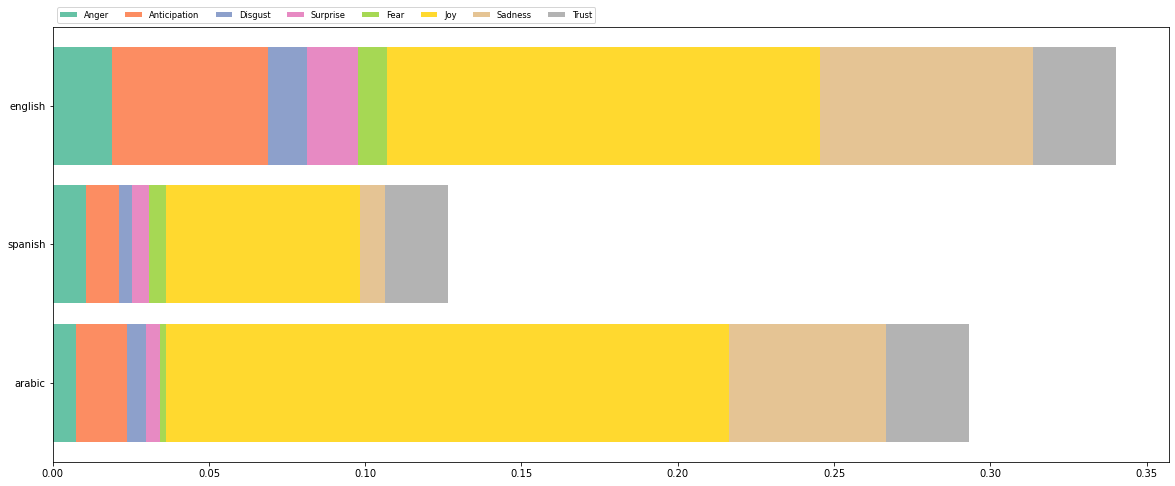

In [26]:
emotion_rows = df.dropna(subset=['emotion'])
emotion_portion = np.array([[emotion_rows.query(f"'{e}' in emotion")[f'{lang}_portion'].sum() for e in EMOTIONS] for lang in LANGUAGES])
colors = [plt.cm.Set2(i) for i in range(len(EMOTIONS))]

plot_emotions(emotion_portion, colors)
plt.show()

This graphic shows the relative popularities of the sets of emojis mapped to each emotion in each language. English and Arabic clearly use a far larger proportion of expressive emojis than Spanish. Because we primarily care about these expressive emojis, let's normalize the data:

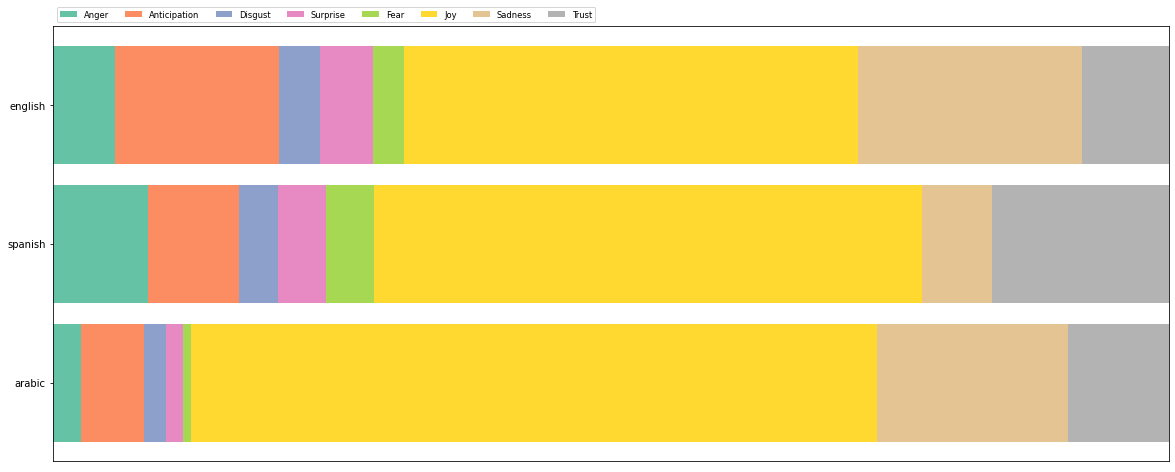

In [27]:
data = np.array([[p / sum(emotion_portion[i]) for p in emotion_portion[i]] for i in range(len(emotion_portion))])

fig, ax = plot_emotions(data, colors, show_xaxis=False)
ax.set_xlim((0,1))
plt.show()

Considering the rather playful attitude typically conveyed by emojis, it's not surprising that 'Joy' is by far the most well represented emotion. I hypothesize that a significant portion of the 'Sadness' emotion is the 😭 emoji, which is probably intended to be used to indicate sincere crying, but in practice is generally used as a 'crying laughing' emoji, an alternative to the uncool 😂, which as `:face_with_tears_of_joy:` is quite literally the crying laughing emoji. Naturally, my experience with the use of emojis is limited to English, and it's very possible 😭 has a more sincere connotation elsewhere.

To better understand the distribution, let's break down each emotion by emoji:

In [28]:
def plot_emojis(data, languages, emotions, normalize=True, update=None, label_axes=False, mark_edges=False, label_pct=False, portrait=False):
    plot_data = np.array([[list(data[lang][emo].values())[i] for emo in emotions for i in range(len(data[lang][emo]))] for lang in languages]) # these 4 lines of code are shamefully inefficient
    if normalize:
        factors = {lang : np.sum(plot_data[i]) for i, lang in enumerate(languages)}
        plot_data = np.array([[list(data[lang][emo].values())[i] / factors[lang] for emo in emotions for i in range(len(data[lang][emo]))] for lang in languages])  # duplicative
    plot_labels = [list(data[lang][emo].keys())[i] for lang in languages for emo in emotions for i in range(len(data[lang][emo]))]  # and unreadable
    discrete_colors = sns.color_palette('hls', len(emotions))
    plot_colors = [sns.dark_palette(discrete_colors[emo_i], len(data[languages[0]][emo]))[i] for emo_i, emo in enumerate(emotions) for i in range(len(data[languages[0]][emo]))] # but save a lot of whitespace
    plot_supercat = [emo for emo in emotions for i in range(len(data[languages[0]][emo]))]

    data_cum = plot_data.cumsum(axis=1)

    if update is None:
        fig, ax = plt.subplots(figsize=FIGSIZE if not portrait else FIGSIZE[::-1])
    else:
        fig, ax = update
        ax.clear()

    ax.invert_yaxis()

    if portrait:
        ax.yaxis.set_visible(label_axes)
    else:
        ax.xaxis.set_visible(label_axes)
    # ax.set_title(title)
    last_elements = [] # elements which go in the legend

    for i, (colname, color) in enumerate(zip(plot_labels, plot_colors)):
        widths = plot_data[:, i]
        starts = data_cum[:, i] - widths

        if not portrait:
            draw_fct = ax.barh
            plot_args = {'y':languages, 'width':widths, 'left':starts, 'height':0.85, 'label':plot_supercat[i], 'color':color}
            rotation = 90
        else:
            draw_fct = ax.bar
            plot_args = {'x':languages, 'height':widths, 'bottom':starts, 'width':0.85, 'label':plot_supercat[i], 'color':color}
            rotation = 0

        if mark_edges:
            plot_args['edgecolor'] = 'white'
        
        rects = draw_fct(**plot_args) #  in hindsight, there are easier ways I should have done this

        if label_pct:
            ax.bar_label(rects, [f"{plot_labels[i]} ({pct * 100:.2f}%)" for pct in widths], label_type='center', color='white', rotation=rotation)
        else:
            ax.bar_label(rects, np.full(len(rects), plot_labels[i]), label_type='center', color='white', rotation=rotation)

        if i == len(plot_supercat) - 1 or plot_supercat[i] != plot_supercat[i + 1]:
            last_elements.append(rects)

    ax.legend(last_elements, emotions, ncol=len(emotions), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    if normalize and portrait:
        ax.set_ylim((1,0))
    elif normalize:
        ax.set_xlim((0,1))

    # print(languages)  # to see when this function runs

    # fig.canvas.draw()
    return fig, ax

# plot_emojis(emoji_portion, ['english', 'spanish'], ['Joy', 'Sadness'])
# plt.show()


In [29]:
# emoji portion by emotion data to be plotted
emoji_portion = {lang : {e : emotion_rows.query(f"'{e}' in emotion").set_index(EMOJI_PLOT_INDEX)[f'{lang}_portion'].to_dict() for e in EMOTIONS} for lang in LANGUAGES}

update = None

def plot_emojis_wrapper(languages, emotions, normalize, axes, edges, label_portion, portrait):
    global update
    plot_emojis(emoji_portion, languages, emotions, normalize, None, axes, edges, label_portion, portrait)
    fig.canvas.draw()
    # plt.show()
    return

In [30]:
languages = widgets.SelectMultiple(options=LANGUAGES, value=['english', 'arabic'], description='Languages', disabled=False)
emotions = widgets.SelectMultiple(options=EMOTIONS, value=['Joy', 'Sadness'], description='Emotions')
normalize = widgets.Checkbox(value=True, description='Normalize')
axes = widgets.Checkbox(value=False, description='Label axis')
edges = widgets.Checkbox(value=False, description='Mark edges')
label_portion = widgets.Checkbox(value=False, description='Label pct')
portrait = widgets.Checkbox(value=False, description='Portrait orientation')

out = widgets.interactive_output(plot_emojis_wrapper, {'languages': languages, 'emotions': emotions, 'normalize': normalize, 'axes': axes, 'edges': edges, 'label_portion':label_portion, 'portrait':portrait})

In [31]:
widgets.VBox([out, widgets.HBox([languages, emotions, widgets.VBox([normalize, axes, edges, label_portion, portrait])])])

Please take a moment to appreciate this interactive plot.

If it doesn't work, make sure you have `matplotlib >= 3.4.1`, which isn't on conda for some reason.

Selecting multiple emotions or languages can be done by shift or ctrl clicking options.

I know the label display is bad when the boxes get small, but the alternative is not displaying those labels at all when the value is too small and while I would do that for a publication, it doesn't really increase readability so much as polish, which is less important for a widget. There's also the question of when you would make the threshold, which depends on the size you make the plot. In a perfect world, the labels would be the emojis themselves, but there's a longstanding bug with how a matplotlib dependency handles fonts that makes it virtually impossible to get glyphs that aren't black and white.

Below is an analysis of the tokens associated with a given emotion that appear in tweets with different combinations of the most common emojis. This is meant to provide insight into how to improve the emoji-emotion mapping, but it makes me more skeptical of the word-emoji mapping than anything.

In theory, because emojis are tone indicators, a tweet with an emoji in it should also have words which correspond to the emotion represented by that emoji. Therefore, it should be possible to work backwards and find the emotion intended by an emoji using the emotion of the words commonly associated with it. This does not seem to work in real life. Emojis with rather uncontroversial meanings often do not correlate with words of that meaning, and the strongest correlations are often with emoji combinations like \['🔥', '✅'\] with no obvious connection to any emotion.

Note that the emojis included are the 35 most common english emojis for the time period to improve comparability. Ideally, I would have used some measure of covariance more robust than average tokens per tweet including an emoji, but I'll have to review some statistics notes and learn more PySpark to do that meaningfully and efficiently.

In [36]:
emoji_corr = {lang : pd.read_csv(EMOJI_CORR_PATH[lang]).sort_values(by=['count(emoji)'], ascending=False) for lang in LANGUAGES}
emoji_corr['english'].head(40)

,Unnamed: 0,emoji,count(emoji),avg(Anger),avg(Anticipation),avg(Disgust),avg(Fear),avg(Joy),avg(Sadness),avg(Surprise),avg(Trust)
283,283,['😂'],7884,0.740233,0.565068,0.422755,0.894597,0.378108,0.762557,0.292872,0.581938
565,565,['‼'],7362,0.309698,0.175632,0.215838,0.446346,0.224803,1.025808,0.103912,1.050530
334,334,['😭'],6443,0.735527,0.450567,0.500078,0.975322,0.330281,0.807853,0.238553,0.525066
796,796,['❤'],5046,0.501189,0.735830,0.398732,0.635553,0.794887,0.627031,0.470075,0.902893
651,651,['✨'],4982,0.524488,0.537937,0.128262,0.549980,0.619831,0.554597,0.523284,0.660578
447,447,['🙏'],4813,0.522335,0.624974,0.495533,0.921255,0.867027,0.800748,0.304176,1.127156
361,361,['🚨'],3413,0.811017,0.637269,0.513917,1.185467,0.486669,0.842074,0.427776,0.839144
684,684,['🔥'],3205,0.569735,0.419345,0.304212,0.795320,0.328549,0.558190,0.258346,0.542902
790,790,['👇'],3184,0.857098,0.675879,0.567525,1.117462,0.480214,0.687814,0.257224,0.783920
500,500,['🤣'],3154,0.681357,0.515853,0.401078,0.843056,0.382372,0.692137,0.282181,0.613507


An interesting way to read this data is using the similarity between the emotion associations of different emoji to find groups of emojis which are used in similar contexts. Below, we'll look at the emojis which are most similar to 😂, the laughing emoji.

In [33]:
def find_similar(data, emoji_index, cutoff=100):
    target_row = data.loc[emoji_index][3:]
    delta = data.copy()[data['count(emoji)'] >= cutoff]
    # delta[[f'avg({emotion})' for emotion in EMOTIONS]] /= delta[[f'avg({emotion})' for emotion in EMOTIONS]].sum()
    delta[[f'avg({emotion})' for emotion in EMOTIONS]] -= target_row

    delta.insert(3, 'loss', sum([abs(delta[f'avg({emotion})']) for emotion in EMOTIONS]))
    
    return delta.sort_values(by=['loss'])

find_similar(emoji_corr['english'], 283).head(20)

,Unnamed: 0,emoji,count(emoji),loss,avg(Anger),avg(Anticipation),avg(Disgust),avg(Fear),avg(Joy),avg(Sadness),avg(Surprise),avg(Trust)
283,283,['😂'],7884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,500,['🤣'],3154,0.298252,-0.058876,-0.049216,-0.021677,-0.05154,0.004264,-0.07042,-0.01069,0.031569
664,664,['😩'],808,0.41307,-0.052115,-0.048979,0.046304,0.003918,0.084764,0.100067,0.069752,0.007171
436,436,"['😭', '🥺']",136,0.427944,0.002414,-0.006245,0.11401,0.068639,0.033657,0.163914,0.030658,-0.008409
334,334,['😭'],6443,0.48157,-0.004706,-0.114502,0.077323,0.080725,-0.047827,0.045296,-0.054318,-0.056872
474,474,['😎'],598,0.601033,0.037359,0.018544,0.082262,0.035169,0.121892,-0.013393,0.076694,0.215721
133,133,"['❤', '😭']",130,0.641113,-0.178695,-0.088145,-0.084293,-0.056135,0.060354,-0.070249,-0.062102,0.041139
413,413,"['😂', '🤣']",537,0.643064,0.121964,0.034559,0.117282,0.131474,0.11165,0.054948,0.040462,0.030725
591,591,"['😂', '😭']",293,0.812882,0.143726,-0.025819,0.078952,0.091751,0.065578,0.230617,0.051838,-0.1246
124,124,['🥺'],2067,0.847563,-0.210964,-0.066762,-0.052653,-0.184872,0.018603,-0.164589,-0.012756,-0.136365


Rather unsurprisingly, the emoji most like the laughing emoji is 🤣, the `:rolling_on_the_floor_laughing:` emoji, which is typically used as a more intense (or less sincere) alternative to 😂.

The high similarity between the contexts of 😭 and 😂 corroborates my earlier claim that it was being used as a 'crying laughing' emoji in lieu of 😂. 

The even greater similarity of `:weary_face:`(😩) is not surprising knowing what it's typically used for, but I doubt I would be able to explain it easily to someone who wasn't already familiar, as it doesn't really correspond to a facial expression most people would make often in conversaion. Generally, 😩 connotates a sarcastic moan, used when joking about liking something or when expressing a facetious and implicitly (if not explicitly) sexual desire. This does not really capture its meaning, and I'm sure searching '😩' on Twitter and reading a couple tweets using it would give a better impression of how it's used, but it should give a general idea of what is meant.

Let's do the same for Spanish and Arabic:

In [34]:
find_similar(emoji_corr['spanish'], 324).head(20)

,Unnamed: 0,emoji,count(emoji),loss,avg(Anger),avg(Anticipation),avg(Disgust),avg(Fear),avg(Joy),avg(Sadness),avg(Surprise),avg(Trust)
324,324,['😂'],1087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,564,['🤣'],575,0.274226,-0.002985,0.009984,0.036888,0.044085,0.046531,0.09215,-0.000944,0.040659
416,416,['🇫🇷'],338,0.275309,-0.066613,0.023181,-0.00463,-0.047868,-0.025849,-0.036505,-0.040383,-0.03028
880,880,['❤'],7349,0.280045,-0.040883,0.038871,-0.024371,-0.025019,0.096992,0.008964,-0.000529,0.044416
546,546,['🤡'],210,0.303268,0.040741,0.072717,0.022561,0.036466,0.041438,0.037657,0.031975,-0.019713
485,485,"['😂', '🤣']",131,0.315519,-0.041047,-0.038407,0.018926,-0.031946,-0.069685,0.018828,-0.004993,-0.091687
805,805,['❗'],996,0.334255,-0.016775,0.003095,-0.0034,0.019627,-0.108505,0.039866,-0.018283,-0.124705
471,471,"['❤', '🙏']",223,0.359318,-0.003461,0.083799,0.00804,0.009645,0.079426,0.043337,0.046902,0.084707
133,133,['🥺'],185,0.360675,0.005992,0.044531,-0.002407,0.046247,0.05109,0.082702,0.092593,0.035113
545,545,['😎'],1105,0.382722,-0.065917,-0.057536,-0.050053,-0.057997,-0.036326,-0.029613,-0.017863,-0.067419


The relative dissimilarity of 😭 in Spanish to the laughing emojis suggests it has a more sincere connotation in the Spanish speaking world.

In [35]:
find_similar(emoji_corr['arabic'], 159).head(20)

,Unnamed: 0,emoji,count(emoji),loss,avg(Anger),avg(Anticipation),avg(Disgust),avg(Fear),avg(Joy),avg(Sadness),avg(Surprise),avg(Trust)
159,159,['😂'],6123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,279,['🤣'],1100,0.266617,-0.036189,0.01454,-0.025923,-0.009951,0.032253,0.042632,0.014119,0.091009
125,125,['👀'],111,0.441097,0.007398,0.020781,0.010227,0.082105,-0.059205,0.023845,0.202833,0.034703
321,321,"['😂', '😭']",396,0.594497,-0.067199,0.13353,-0.019257,-0.064496,0.027404,0.170309,0.056846,-0.055455
188,188,['😭'],1743,0.629415,-0.090492,-0.044654,-0.091337,-0.149198,-0.04435,-0.108686,-0.030921,-0.069777
206,206,['🚨'],6573,0.674289,0.039388,-0.035559,0.086119,0.080284,-0.143132,0.183133,0.09792,-0.008755
231,231,['🙄'],248,0.74615,-0.039137,-0.029023,-0.046261,0.232425,-0.060695,0.300726,0.019456,0.018429
236,236,"['😂', '🤣']",228,0.755712,0.097607,0.01604,0.038558,0.199459,0.023417,0.208055,0.015777,0.156799
21,21,"['😭', '💔']",151,0.87885,-0.099994,0.215877,-0.015845,0.208231,0.275799,-0.033551,0.013047,0.016506
362,362,['✨'],947,0.91247,-0.081218,0.156687,-0.03516,0.149097,0.131649,-0.016634,-0.071766,0.27026


A potentially confusing aspect of this data for Spanish and Arabic is the fact that there are significantly fewer tokens associated with an emotion per tweet, and as a result the loss is artificially low. I suspect the reason this happens is because the emotion regex files for Spanish and Arabic seem to have been autonomously translated directly from the English regex. Besides the fact that many words are replaced with "NO TRANSLATION" and the translations which do work are of dubious quality, it's unreasonable to expect much from a lexicon developed for English attempting to interpret another language through direct machine translation of individual words.

Accounting for this, you still see many of the same associations with 😂 in all three languages, such as 🤣 taking the top spot.